In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import seaborn as sns

We can sample from any arbitrary distribution using the inverse cdf transformation and a uniform
random number generator. The only premise is that the distribution we want to sample from has
an invertible cdf function.

 Let $X\sim F$ be the random variable we are interested to sample, with a distribution $F$. Then:
 
 If $X\sim F\Leftrightarrow Y=F(X)\sim U(0,1)$,
 
 Therefore, if we can invert the cdf $F$, we can sample from the original distribution as:
 $X=F^{-1} (U)\sim F$, using a $U(0,1)$ random number generator.

# Generate 10,000 daily returns from the Cauchy Distribution

The Cauchy cdf is: $F_x(x)=\frac{1}{2}+\frac{1}{\pi}arctan(\frac{x-\alpha}{\beta})$ for $x\in R$ with location $\alpha$ and scale $\beta$.
    
Letting $\alpha=0$ can further derive the inverse cdf as: $F^{-1}(x)=\beta\;tan\left[\pi\left(x-0.5\right)\right]$ and so:
    
$Y=\beta\;tan\left[\pi\left(U-0.5\right)\right]\sim Cauchy$
    
We can adjust the scale parameter such that: $P\left[|X_{i}|\leq0.06\right]=0.95\;\forall\;i=1:10000\; \text{as}\;\beta=\frac{0.06}{tan\left(0.475\pi\right)}$.

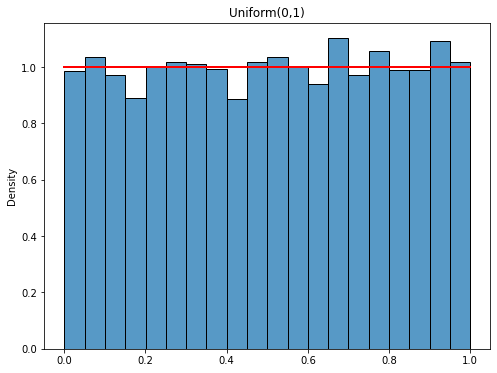

In [2]:
#Step 1: Sample 10,000 Uniform random variables:
np.random.seed(719)
U=np.random.uniform(0,1,10000)
plt.figure(figsize=(8,6))
hist=sns.histplot(U,bins=20,stat="density")
plt.title("Uniform(0,1)")
#Normalize the axis for the horizontal line: x_min'=(a'-a)/(b-a) and␣x_max'=(b'-a)/(b-a)
x_min,x_max=plt.xlim()
plt.axhline(y=1,xmin=(0-x_min)/(x_max-x_min),xmax=(1-x_min)/(x_max-x_min),color='red',linewidth=2)
plt.show()

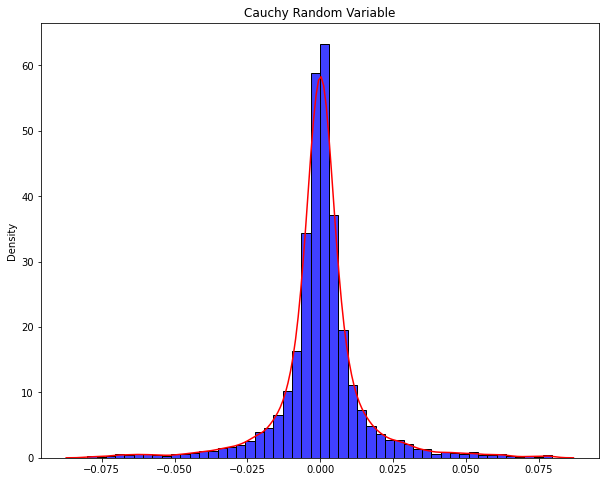

In [3]:
#Step 2: Generate Cauchy using the Inverse CDF Transformation:
#Adjust the location:
b=0.06/tan(0.475*pi)
Y_cauchy=b*np.tan(pi*(U-0.5))
#Subset for data between -8% and 8% to enable visualization since the range is␣R:
ind=(Y_cauchy>=-0.08) & (Y_cauchy<=0.08)
plt.figure(figsize=(10,8))
sns.histplot(Y_cauchy[ind],bins=50,stat="density",color="blue")
sns.kdeplot(Y_cauchy[ind],color="red")
plt.title("Cauchy Random Variable")
plt.show()

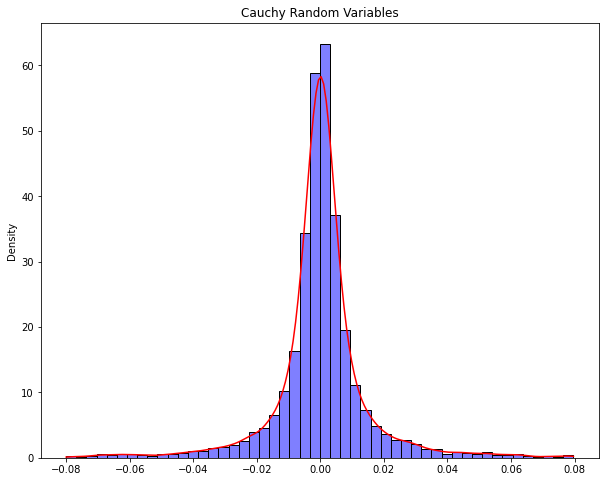

In [6]:
#Alternative Visualization:
plt.figure(figsize=(10,8))
ax=sns.histplot(Y_cauchy[ind],bins=50,kde=True,color="blue",stat="density")
ax.lines[0].set_color("red")
ax.set_title("Cauchy Random Variables")
plt.show()

# Generate 10,000 daily returns from the Logistic Distribution

The logistic distribution CDF is: $F_{x}(x)=\frac{1}{1+e^{-\frac{x-\alpha}{\beta}}}\;\text{for}\;x\in R$ with location $\alpha$ and scale $\beta$.
    
Letting the location $\alpha=0$ we can easilyderive the inverse CDF as: $F^{-1}(x)=-\beta\;ln\left[\frac{1-x}{x}\right]$.
    
Also we can adjust the scale as: $\beta=-\frac{0.06}{ln\left(\frac{0.025}{0.975}\right)}\;\text{such that}\;P\left[|X_{i}|\leq0.06\right]=0.95\; \forall\;i=1:10000$

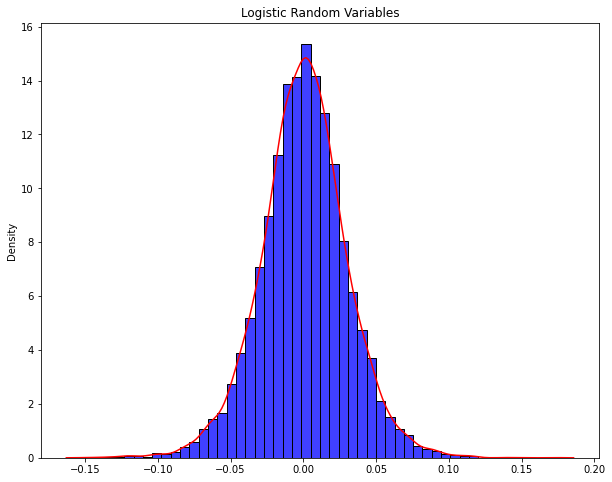

In [4]:
#Adjsut the scale parameter:
b=-0.06/(log(0.025/0.975))
#Generate the 10,000 logistic random variables using the previously generated uniform random variables:
Y_logistic=-b*(np.log(1-U)-np.log(U))
plt.figure(figsize=(10,8))
sns.histplot(Y_logistic,bins=50,stat="density",color="blue")
sns.kdeplot(Y_logistic,color="red")
plt.title("Logistic Random Variables")
plt.show()

#  Comparing the cumulative returns

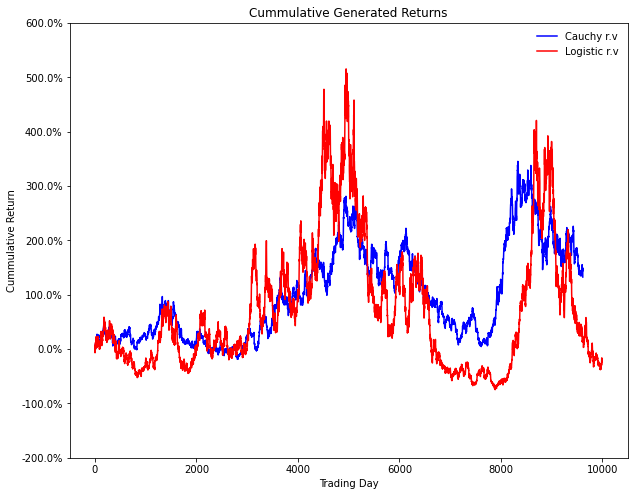

In [5]:
 cum_cauchy=((1+Y_cauchy[ind]).cumprod())-1
cum_logistic=((1+Y_logistic).cumprod())-1
plt.figure(figsize=(10,8))
plt.plot(cum_cauchy,label="Cauchy r.v",color="blue")
plt.plot(cum_logistic,label="Logistic r.v",color="red")
plt.legend(frameon=False)
plt.title("Cummulative Generated Returns")
yticks=plt.yticks()[0]
labs=[str(100*round(tick,2))+"%" for tick in yticks]
plt.yticks(ticks=yticks,labels=labs)
plt.ylabel("Cummulative Return")
plt.xlabel("Trading Day")
plt.show()

The truncated Cauchy and the Logistic random variable display approximately the same amount of
variation. Of course, if the Cauchy r.v is not truncated we expect to see greater amount of variance
in its generated time-series. The logistic r.v converges to zero faster than the Cauchy.